In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
crowdfunding_2018 = pd.read_csv('ks-projects-201801.csv')

crowdfunding_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [19]:
clean_crowdfunding_2018 = crowdfunding_2018.drop(['name', 'goal', 'pledged', 'usd pledged'], axis=1)

pd.options.display.float_format = "{:,.2f}".format

clean_crowdfunding_2018['launched'] = pd.to_datetime(clean_crowdfunding_2018['launched'])
clean_crowdfunding_2018['deadline'] = pd.to_datetime(clean_crowdfunding_2018['deadline'])
clean_crowdfunding_2018['usd_pledged_real'] = clean_crowdfunding_2018['usd_pledged_real'].round(2)
clean_crowdfunding_2018['days_to_deadline'] = (clean_crowdfunding_2018['deadline'] - clean_crowdfunding_2018['launched']).dt.days

clean_crowdfunding_2018

,ID,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,days_to_deadline
0,1000002330,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.00,"1,533.95",58
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,"2,421.00","30,000.00",59
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.00,"45,000.00",44
3,1000007540,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.00,"5,000.00",29
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,"1,283.00","19,500.00",55
...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,canceled,1,US,25.00,"50,000.00",29
378657,999977640,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.00,"1,500.00",26
378658,999986353,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.00,"15,000.00",45
378659,999987933,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.00,"15,000.00",30


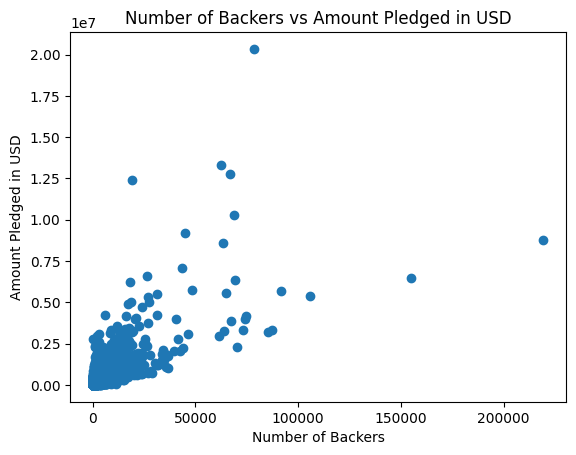

In [18]:
plt.scatter(clean_crowdfunding_2018['backers'], clean_crowdfunding_2018['usd_pledged_real'])
plt.xlabel('Number of Backers')
plt.ylabel('Amount Pledged in USD')
plt.title('Number of Backers vs Amount Pledged in USD')
plt.show()